**Автор:** *Лосевской Артём*


<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

## Препроцессинг

In [533]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Выгружу датасет *shopping_trends.csv* из архива:

In [534]:
data_shopping = pd.read_csv('shopping_trends.csv')
df_shopping = data_shopping.copy()
df_shopping

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


Убедимся, что в данных нет пропусков:

In [535]:
df_shopping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [536]:
df_shopping.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

<h2>Задание 1.1. Гипотезы </h2> 

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

### Решение

Отмечу сразу и не раз вернусь к этому, что каждая запись(строчка) в датасете относится к уникальнмоу пользователю:

In [537]:
df_shopping['Customer ID'].nunique()

3900

### 1.1.1. Люди в возрасте старше 50 лет предпочитают расплачиваться наличными

Оценим количество покупок покупателей данной выборки в разрезе по способам оплаты:

In [538]:
data_aged = df_shopping[df_shopping['Age'] > 50]
#df_aged['Payment Method'].value_counts() — алььтернативный и не менее корректный способ оценки в контексте именно данной задачи
df_aged_payment = data_aged.groupby('Payment Method')['Customer ID'].count().sort_values(ascending=False).reset_index()
df_aged_payment.columns = ['Payment Method', 'Number of Purchases']
df_aged_payment

,Payment Method,Number of Purchases
0,Credit Card,267
1,Cash,261
2,Venmo,256
3,Bank Transfer,238
4,PayPal,230
5,Debit Card,224


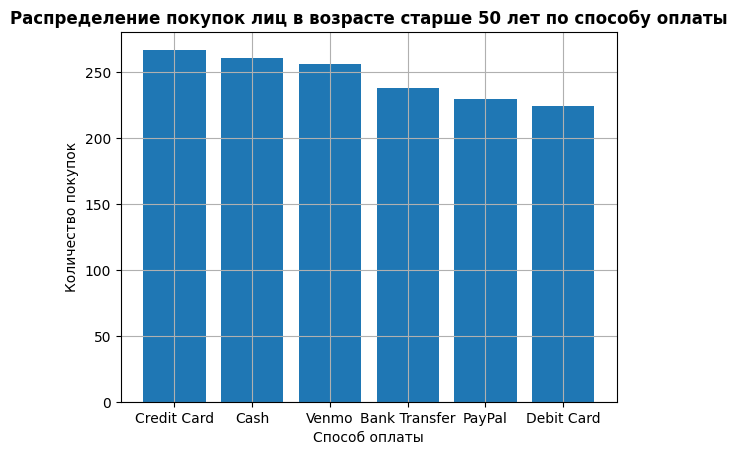

In [539]:
plt.bar(x=df_aged_payment['Payment Method'], height=df_aged_payment['Number of Purchases'])
plt.xlabel('Способ оплаты')
plt.ylabel('Количество покупок')
plt.title('Распределение покупок лиц в возрасте старше 50 лет по способу оплаты', weight = 'bold')
plt.grid()
plt.show()

Видим, что гипотеза оказалась неверна, и самый популярным способом оплаты в выборке покупателей старше 50 лет является кредитная карта

### 1.1.2. Подписка пользуется большей популярностью среди молодых покупателей.

Уточню гипотезу: процент покупок с подпиской для лиц 30 лет и младше превышает тот же процент для лиц 31 года и старше.

In [540]:
age_max = df_shopping["Age"].max()

In [541]:
ages = pd.cut(df_shopping["Age"], [0, 30, age_max])

In [542]:
df_subsription = df_shopping.pivot_table('Customer ID', index = 'Subscription Status', columns = ages, aggfunc='count', observed=False)
df_subsription

Age,"(0, 30]","(30, 70]"
Subscription Status,,
No,700,2147
Yes,249,804


В процентах:

In [543]:
total_purchases_ages = df_subsription.sum(axis=0)
df_subsription.div(total_purchases_ages, axis = 1) * 100

Age,"(0, 30]","(30, 70]"
Subscription Status,,
No,73.7619,72.755
Yes,26.2381,27.245


Гипотеза оказалась неверна: среди покупателей в возрасте 31 года и старше мы получили, что количество покупок с подпиской больше на 1 процентный пункт, чем для покупателей до 30 лет включительно.

### 1.1.3. Подписка пользуется большей популярностью среди женщин, нежели мужчин

In [544]:
df_subsription_gender = df_shopping.pivot_table('Customer ID', index = 'Subscription Status', columns = 'Gender', aggfunc='count', observed=False)
df_subsription_gender

Gender,Female,Male
Subscription Status,,
No,1248.0,1599.0
Yes,NaN,1053.0


In [545]:
total_purchases_gender = df_subsription_gender.sum(axis=0)
df_subsription_gender.div(total_purchases_gender, axis = 1) * 100

Gender,Female,Male
Subscription Status,,
No,100.0,60.2941
Yes,NaN,39.7059


Совсем мимо)): женщины не соврешили ни одной покупки по подписке, в то время как для мужчин доля покупок по подписке составила почти 40%!

### 1.1.4. Промокодами больше всего пользуются люди в возрасте от 20 до 30 лет

Просегментируем всех от минимального возраста к максимальному 

In [546]:
age_min = df_shopping['Age'].min()
age_min

18

In [547]:
bins = [age_min, 20, 30, 40, 50, 60, age_max]

age_segments = pd.cut(df_shopping['Age'], bins)
df_promocodes = df_shopping.pivot_table('Customer ID', index='Promo Code Used', columns=age_segments, aggfunc='count', observed = False)
df_promocodes

Age,"(18, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Promo Code Used,,,,,,
No,78,417,414,441,432,401
Yes,65,320,311,309,321,322


In [548]:
total_promocodes_ages = df_promocodes.sum(axis=0)
df_promocodes.div(total_promocodes_ages, axis = 1) * 100

Age,"(18, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Promo Code Used,,,,,,
No,54.5455,56.5807,57.1034,58.8,57.3705,55.4633
Yes,45.4545,43.4193,42.8966,41.2,42.6295,44.5367


Видим, что доля больше всего среди пользователей 18-20 лет включительно. На втором же месте выборка (60:70] лет.

### 1.1.5. Оценки товаров выше, если применена скидка и прмокод

In [549]:
avg_rating_discounts = df_shopping.groupby(['Discount Applied', 'Promo Code Used'])["Review Rating"].mean().reset_index()
avg_rating_discounts

,Discount Applied,Promo Code Used,Review Rating
0,No,No,3.7577
1,Yes,Yes,3.7397


Реузльтат вышел обратный, хотя разница незначительна: средняя оценка по товарам с примененным промокодом и скидкой оказалась на ~0.02 ниже, чем по товарам, купленным без скидки и промокода.

### 1.1.6. Чем дороже свитер, тем ниже его рейтинг

In [550]:
min_price_sweater = df_shopping[df_shopping['Item Purchased'] == 'Sweater']['Purchase Amount (USD)'].min()

In [551]:
max_price_sweater = df_shopping[df_shopping['Item Purchased'] == 'Sweater']['Purchase Amount (USD)'].max()

In [552]:
sweater_bins = np.arange(min_price_sweater, max_price_sweater + 1, 20)
sweater_bins

array([ 20,  40,  60,  80, 100], dtype=int64)

In [553]:
sweater_prices = pd.cut(df_shopping['Purchase Amount (USD)'], sweater_bins)
df_sweater_prices = df_shopping.pivot_table(values='Review Rating', index=sweater_prices, aggfunc='mean', observed = False).reset_index()
df_sweater_prices

,Purchase Amount (USD),Review Rating
0,"(20, 40]",3.7437
1,"(40, 60]",3.6799
2,"(60, 80]",3.7875
3,"(80, 100]",3.7801


Text(0, 0.5, 'Средний рейтинг')

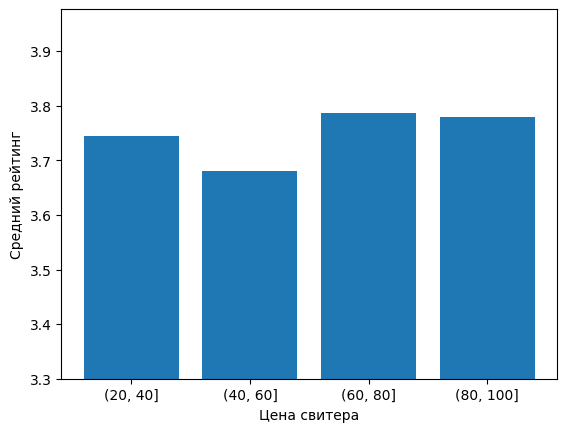

In [554]:
df_sweater_prices['Purchase Amount (USD)'] = df_sweater_prices['Purchase Amount (USD)'].astype(str)
plt.bar(data=df_sweater_prices, x=df_sweater_prices['Purchase Amount (USD)'], height=df_sweater_prices['Review Rating'])
plt.ylim(bottom = 3.3)
plt.xlabel('Цена свитера')
plt.ylabel('Средний рейтинг')

Гипотеза при данной сегментации не подтвердилась. В целом видно, что средний рейтинг свитеров с ценой (40;60] ниже, чем у свитеров более высоких ценовых категорий.

### 1.1.7. Оценки от покупателей, которые покупают чаще, в среднем выше

In [555]:
df_rating_purch_freq = data_aged.groupby('Frequency of Purchases')['Review Rating'].mean().sort_values(ascending=False).reset_index()
df_rating_purch_freq

,Frequency of Purchases,Review Rating
0,Fortnightly,3.7853
1,Every 3 Months,3.7715
2,Monthly,3.7590
3,Weekly,3.7290
4,Bi-Weekly,3.7191
5,Annually,3.7152
6,Quarterly,3.6641


Линейной связи не наблюдается, однако оценки пользователей с частотой покупок 1 раз в год и 1 раз в квартал действительно ниже, чем у остальных категорий.

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 

### 1.2.1. Самый популярный товар.

Определим в качестве метрики популярности количество покупок данного товара. Под товаром буду рассматривать "Item Purchased". Размеры и цвет не беру в расчёт, потому что 3900 записей таблицы уже маловато для агрегации по цвету и размеру.

In [556]:
df_shopping.groupby(['Size', 'Color', 'Item Purchased'])['Customer ID'].count()

Size  Color   Item Purchased
L     Beige   Backpack          1
              Belt              2
              Blouse            1
              Boots             2
              Coat              1
                               ..
XL    Yellow  Shirt             1
              Shorts            1
              Sunglasses        2
              Sweater           2
              T-shirt           1
Name: Customer ID, Length: 1823, dtype: int64

In [557]:
n_purchases = df_shopping.groupby('Item Purchased')['Customer ID'].count()
n_purchases

Item Purchased
Backpack      143
Belt          161
Blouse        171
Boots         144
Coat          161
Dress         166
Gloves        140
Handbag       153
Hat           154
Hoodie        151
Jacket        163
Jeans         124
Jewelry       171
Pants         171
Sandals       160
Scarf         157
Shirt         169
Shoes         150
Shorts        157
Skirt         158
Sneakers      145
Socks         159
Sunglasses    161
Sweater       164
T-shirt       147
Name: Customer ID, dtype: int64

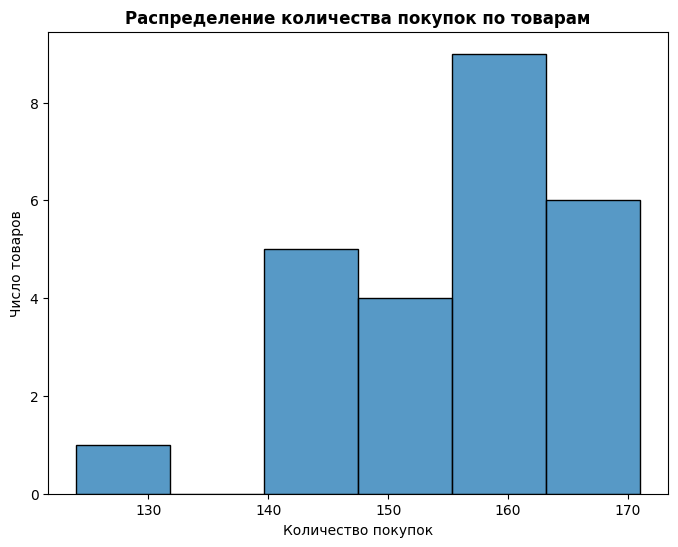

In [558]:
fig = plt.figure(figsize = (8,6))
sns.histplot(n_purchases)
plt.xlabel('Количество покупок')
plt.ylabel('Число товаров')
plt.title('Распределение количества покупок по товарам', weight = 'bold')
plt.show()

In [559]:
max_purchases = n_purchases.max()
max_purchases

171

In [560]:
items_with_max_purchases = n_purchases[n_purchases == max_purchases].index.tolist()
items_with_max_purchases

['Blouse', 'Jewelry', 'Pants']

Выходит, по количеству покупок лидируют **Blouse, Jewelry, Pants** — с выбранной нами метрикой популярности именно они и являются самыми популярными.

А что со средним рейтингом? 

- Количество покупок любого из товаров больше 100, но меньше 200.
- Поэтому средний рейтинг репрезентативен для всех них в примерно равной степени.
- Тоже можно было бы выбрать в качестве метрики популярности (хотя такой выбор менее обоснован).

In [561]:
avg_rating_item = df_shopping.groupby('Item Purchased')["Review Rating"].mean()
avg_rating_item

Item Purchased
Backpack      3.7524
Belt          3.7615
Blouse        3.6836
Boots         3.8125
Coat          3.7304
Dress         3.7548
Gloves        3.8643
Handbag       3.7752
Hat           3.8065
Hoodie        3.7192
Jacket        3.7632
Jeans         3.6484
Jewelry       3.7561
Pants         3.7187
Sandals       3.8413
Scarf         3.7000
Shirt         3.6296
Shoes         3.7473
Shorts        3.7115
Skirt         3.7823
Sneakers      3.7579
Socks         3.7509
Sunglasses    3.7447
Sweater       3.7671
T-shirt       3.7830
Name: Review Rating, dtype: float64

In [562]:
max_avg_rating_item = avg_rating_item.max()
max_avg_rating_item

3.8642857142857143

In [563]:
items_with_max_rating = avg_rating_item[avg_rating_item  == max_avg_rating_item].index.tolist()
items_with_max_rating

['Gloves']

### 1.2.2. Распределение покупателей по полу

In [564]:
df_shopping['Customer ID'].nunique()

3900

В нашем датасете число покупателей равно числу записей равно числу уникальных Customer ID, так что каждая покупка совершена уникальным покупателем.

In [565]:
df_shopping['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

In [566]:
df_shopping['Gender'].value_counts(normalize=True)

Gender
Male      0.68
Female    0.32
Name: proportion, dtype: float64

In [567]:
gender_data = df_shopping.groupby('Gender')['Customer ID'].count()
gender_data

Gender
Female    1248
Male      2652
Name: Customer ID, dtype: int64

In [568]:
gender_data_df = gender_data.reset_index()
gender_data_df

,Gender,Customer ID
0,Female,1248
1,Male,2652


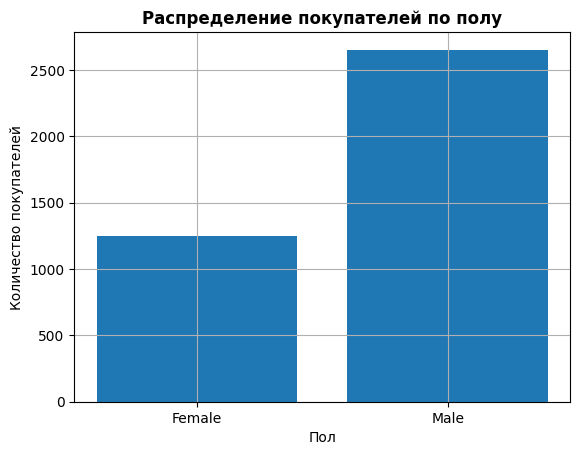

In [569]:
plt.bar(x='Gender', height='Customer ID', data=gender_data_df)
plt.xlabel('Пол')
plt.ylabel('Количество покупателей')
plt.title('Распределение покупателей по полу', weight = 'bold')
plt.grid()
plt.show()

### 1.2.3 Какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

Сначала поймём, какие товары будем называть самыми дорогими.

In [570]:
prices = df_shopping['Purchase Amount (USD)']
prices

0       53
1       64
2       73
3       90
4       49
        ..
3895    28
3896    49
3897    33
3898    77
3899    81
Name: Purchase Amount (USD), Length: 3900, dtype: int64

<Axes: xlabel='Purchase Amount (USD)', ylabel='Count'>

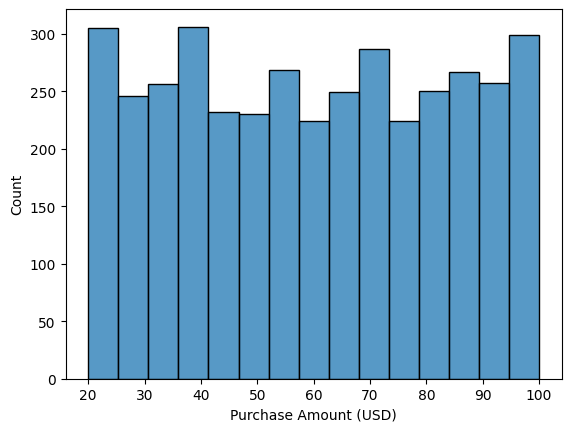

In [571]:
sns.histplot(prices)

Серьезных выбросов в данных нет.

Пускай дорогими будут называться те, цены которых превышают квантиль $q = 0.9$. Иными словами, превышают цену, левее которой лежит 90% площади распределения; превышают цену 90% остальных покупок из данных.

In [572]:
high_price = np.percentile(prices, 90)
high_price

93.0

Значит, будем смотреть на товары, цена которых равна или превышает 93

In [573]:
df_expensive_shopping = df_shopping[df_shopping['Purchase Amount (USD)'] >= 93]
df_expensive_shopping

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
28,29,54,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Debit Card,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
42,43,20,Male,Coat,Outerwear,100,Tennessee,M,Beige,Spring,4.1,Yes,Bank Transfer,Free Shipping,Yes,Yes,15,PayPal,Annually
54,55,47,Male,Coat,Outerwear,94,New Mexico,M,Brown,Summer,4.2,Yes,Bank Transfer,Next Day Air,Yes,Yes,35,Debit Card,Bi-Weekly
66,67,31,Male,Blouse,Clothing,94,Pennsylvania,S,Magenta,Winter,4.7,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,3,Venmo,Every 3 Months
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3864,3865,55,Female,T-shirt,Clothing,99,Wyoming,S,Blue,Winter,4.9,No,Bank Transfer,Express,No,No,1,Debit Card,Fortnightly
3871,3872,55,Female,T-shirt,Clothing,97,Minnesota,M,Black,Fall,4.1,No,Credit Card,2-Day Shipping,No,No,20,Bank Transfer,Every 3 Months
3872,3873,41,Female,Jacket,Outerwear,94,New Hampshire,M,Green,Spring,4.3,No,Cash,Standard,No,No,3,Cash,Monthly
3877,3878,28,Female,Hoodie,Clothing,96,Nevada,M,Olive,Spring,4.2,No,Venmo,Next Day Air,No,No,46,Debit Card,Monthly


#### Пол

In [574]:
expensive_gender = df_expensive_shopping.groupby('Gender')['Customer ID'].count()
expensive_gender

Gender
Female    130
Male      277
Name: Customer ID, dtype: int64

Выходит, мужчины покупают больше дорогих товаров. 

Я проверил, что результат сохраняется, когда мы в качестве threshold берём значения вплоть до 100. Притом и пропорции покупок мужчин/женщин остаются примерно одинаковые.

#### Возраст

In [575]:
n_expensive_age = df_expensive_shopping.groupby('Age')['Customer ID'].count()
n_expensive_age.head()

Age
18     9
19     8
20    10
21     8
22     4
Name: Customer ID, dtype: int64

<BarContainer object of 53 artists>

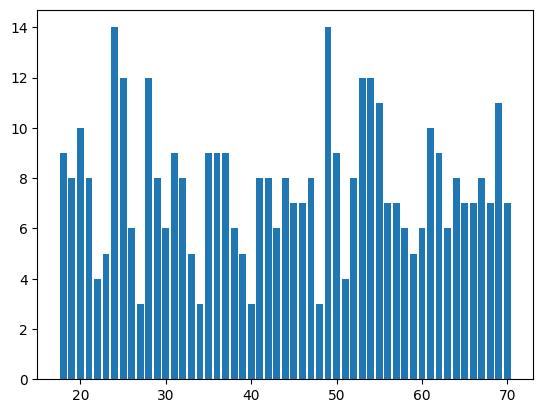

In [576]:
age_data_df = n_expensive_age.reset_index()
plt.bar(x='Age', height='Customer ID', data=age_data_df)

In [577]:
most_expensive_age = n_expensive_age.max()
most_expensive_age

14

In [578]:
age_with_most_expensive_purchases = n_expensive_age[n_expensive_age == most_expensive_age].index.tolist()
age_with_most_expensive_purchases

[24, 49]

Самые дорогие покупки чаще всего совершали люди в возрасте 24 и 49 лет.

### 1.2.4. Зависимость между цветом одежды и сезоном

Здесь удобно посмотреть на долю покупок товаров данного цвета в данный сезон от общего числа покупок товаров всех цветов в данный сезон

In [579]:
data_color_season = df_shopping.pivot_table(values = 'Customer ID', index='Color', columns='Season', aggfunc='count')
data_color_season.head()

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,34,39,37,37
Black,42,43,42,40
Blue,32,39,46,35
Brown,35,33,33,40
Charcoal,32,42,36,43


In [580]:
data_color_season.sum(axis=0)

Season
Fall      975
Spring    999
Summer    955
Winter    971
dtype: int64

In [581]:
pd.set_option('display.precision', 4)
fraction_color_season = data_color_season.div(data_color_season.sum(axis=0), axis=1)
fraction_color_season.head()

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,0.0349,0.039,0.0387,0.0381
Black,0.0431,0.043,0.0440,0.0412
Blue,0.0328,0.039,0.0482,0.0360
Brown,0.0359,0.033,0.0346,0.0412
Charcoal,0.0328,0.042,0.0377,0.0443


Text(0.5, 1.0, 'Доля покупок товаров данного цвета среди покупок всех цветов в данный сезон')

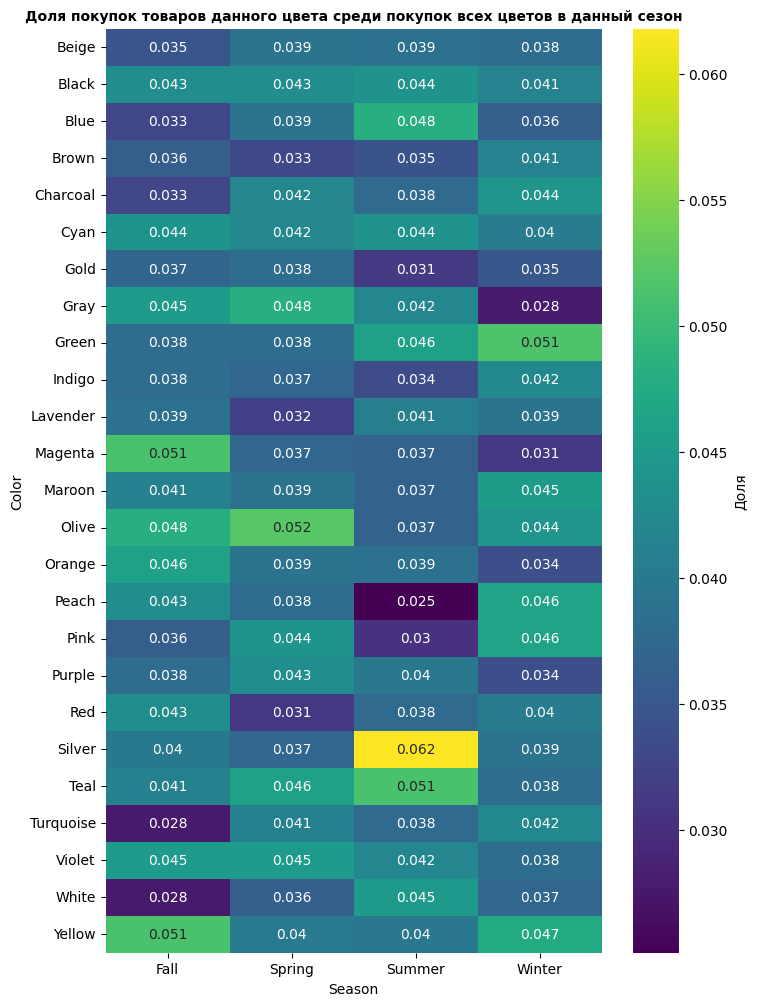

In [582]:
fig = plt.figure(figsize=(8,12))
sns.heatmap(fraction_color_season, annot = True,
            cmap='viridis',
            cbar=True,
            xticklabels=True,
            yticklabels=True,
            cbar_kws={'label': 'Доля'}).set_title('Доля покупок товаров данного цвета среди покупок всех цветов в данный сезон', size=10, weight='bold')

Цветов, конечно, многовато, но некоторые тренды можно увидеть. 

- Так, например, доля некоторых цветов относительна стабильна по сезонам (Beige, Black, Cyan). 

- На самом деле, колебания для большинства цветов как будто не сильно значительны.

- Товары белого и серебряного цветов больше покупают летом.

- Yellow и Magenta — больше всего осенью, Green — зимой

Впрочем, можно посмотреть и на изменение доли данного цвета по сезонам относительно максимума по сезонам

In [583]:
data_color_season.max(axis=1).head()

Color
Beige       39
Black       43
Blue        46
Brown       40
Charcoal    43
dtype: int64

In [584]:
fraction_color_season_from_max = data_color_season.div(data_color_season.max(axis=1), axis=0)
fraction_color_season_from_max.head()

Season,Fall,Spring,Summer,Winter
Color,,,,
Beige,0.8718,1.0000,0.9487,0.9487
Black,0.9767,1.0000,0.9767,0.9302
Blue,0.6957,0.8478,1.0000,0.7609
Brown,0.8750,0.8250,0.8250,1.0000
Charcoal,0.7442,0.9767,0.8372,1.0000


<Axes: xlabel='Season', ylabel='Color'>

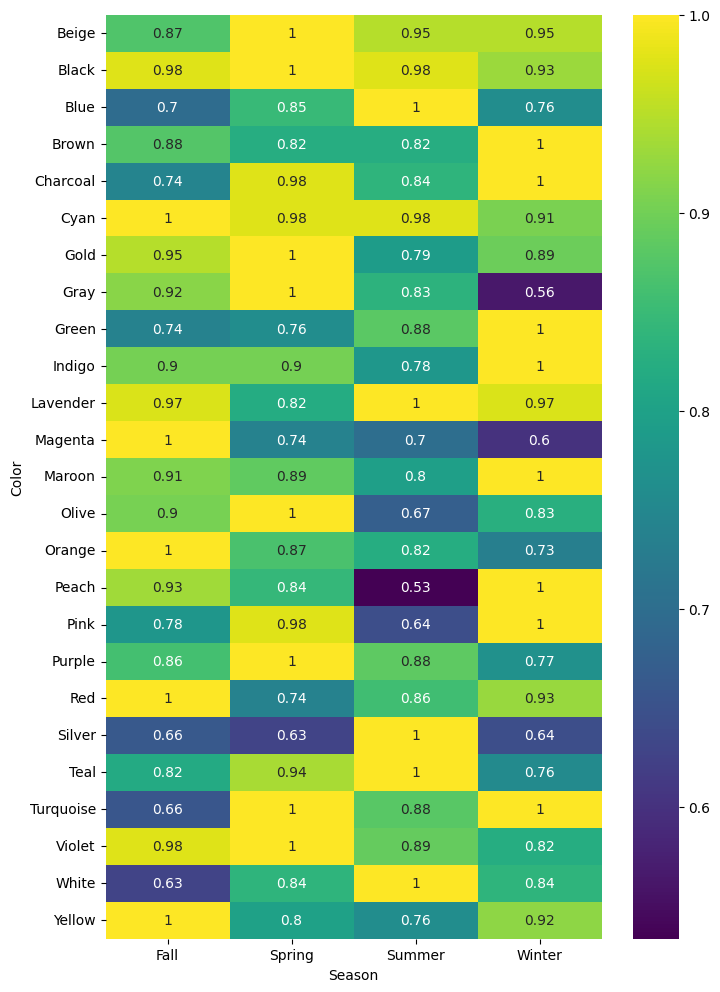

In [585]:
fig = plt.figure(figsize=(8,12))
sns.heatmap(fraction_color_season_from_max, annot = True,
            cmap='viridis')

В относительных величинах становится видно, например, что товары цвета Peach приобретаются почти вдвое реже летом, чем зимой

### 1.2.5. Cезонный mau (уникальных пользователей за сезон) и его динамика.

В датасете каждая запись относится к уникальному пользователю:

In [586]:
df_shopping['Customer ID'].nunique()

3900

Считаем их количество в каждый сезон:

In [587]:
season_data_df = df_shopping['Season'].value_counts().reset_index()
season_data_df.columns = ['Сезон', 'Уникальные пользователи']
season_data_df

,Сезон,Уникальные пользователи
0,Spring,999
1,Fall,975
2,Winter,971
3,Summer,955


Динамика:

([0, 1, 2, 3],
 [Text(0, 0, 'Spring'),
  Text(1, 0, 'Fall'),
  Text(2, 0, 'Winter'),
  Text(3, 0, 'Summer')])

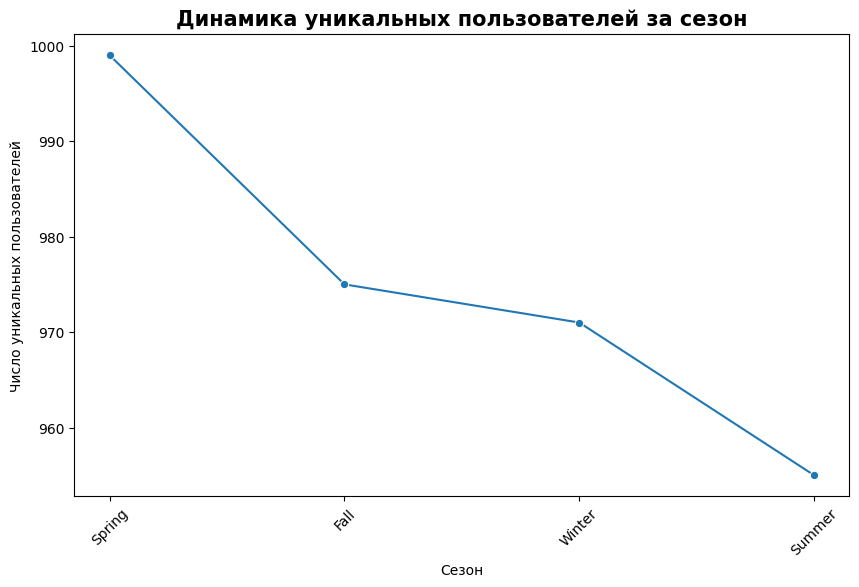

In [588]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=season_data_df, x='Сезон', y='Уникальные пользователи', marker = 'o')

plt.title('Динамика уникальных пользователей за сезон', fontsize = 15, weight = 'bold')
plt.xlabel('Сезон')
plt.ylabel('Число уникальных пользователей')
plt.xticks(rotation=45)

<BarContainer object of 4 artists>

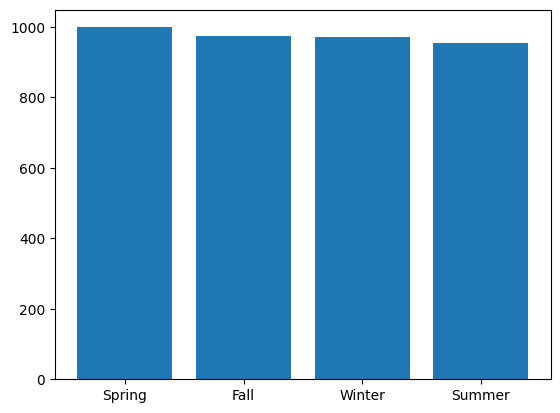

In [589]:
plt.bar(data=season_data_df, x='Сезон', height='Уникальные пользователи')

In [590]:
season_data_df['Динамика (к предыдщему сезону)'] = season_data_df['Уникальные пользователи'].diff()
season_data_df['Динамика (доля от максимума)'] = season_data_df['Уникальные пользователи'] / season_data_df['Уникальные пользователи'].max()
season_data_df

,Сезон,Уникальные пользователи,Динамика (к предыдщему сезону),Динамика (доля от максимума)
0,Spring,999,NaN,1.000
1,Fall,975,-24.0,0.976
2,Winter,971,-4.0,0.972
3,Summer,955,-16.0,0.956


### 1.2.6. Cамая популярная буква в названии одежды. 

Нужно выбрать первые буквы из товаров (Item Purchased) категории Clothing.

Под популярной буду иметь в виду первую букву, которая встречается чаще всего среди названий купленных товаров.

In [591]:
df_clothing = df_shopping[df_shopping['Category'] == 'Clothing']
first_letters = df_clothing['Item Purchased'].str[0].value_counts()
first_letters

Item Purchased
S    807
B    171
P    171
D    166
H    151
T    147
J    124
Name: count, dtype: int64

Видим, что буква S — явный фаворит. Именно она чаще всего встречается первой среди купленных товаров категории Clothing

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [592]:
data_drinks = pd.read_csv('drinks.csv')
df_drinks = data_drinks.copy()
df_drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


## Вино

Выведем топ-10 стран по потреблению вина (wine_servings = glasses of wine per person per year). 

Так же поступим и с другими спиртными напитками

In [593]:
top_10_wine = df_drinks.nlargest(10, 'wine_servings')
top_10_wine[['country', 'wine_servings']].sort_values(by=['wine_servings'], ascending=False)

,country,wine_servings
61,France,370
136,Portugal,339
3,Andorra,312
166,Switzerland,280
48,Denmark,278
156,Slovenia,276
99,Luxembourg,271
42,Croatia,254
83,Italy,237
55,Equatorial Guinea,233


## Пиво

In [594]:
top_10_beer = df_drinks.nlargest(10, 'beer_servings')
top_10_beer[['country', 'beer_servings']].sort_values(by=['beer_servings'], ascending=False)

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


## Spirit (водка и прочее)

In [595]:
top_10_spirit = df_drinks.nlargest(10, 'spirit_servings')
top_10_spirit[['country', 'spirit_servings']].sort_values(by=['spirit_servings'], ascending=False)

,country,spirit_servings
68,Grenada,438
15,Belarus,373
73,Haiti,326
141,Russian Federation,326
144,St. Lucia,315
72,Guyana,302
155,Slovakia,293
50,Dominica,286
169,Thailand,258
40,Cook Islands,254


## Total

In [596]:
top_10_total_litres_of_pure_alcohol = df_drinks.nlargest(10, 'total_litres_of_pure_alcohol')
top_10_total_litres_of_pure_alcohol[['country', 'total_litres_of_pure_alcohol']].sort_values(by=['total_litres_of_pure_alcohol'], ascending=False)

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
81,Ireland,11.4
99,Luxembourg,11.4
155,Slovakia,11.4


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 

In [597]:
data_tarantino = pd.read_csv('tarantino.csv')
df_tarantino = data_tarantino.copy()
df_tarantino

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61
...,...,...,...,...
1889,Jackie Brown,word,motherfucker,141.93
1890,Jackie Brown,word,ass,142.43
1891,Jackie Brown,word,fucking,142.47
1892,Jackie Brown,word,goddamn,142.97


## Число проклятий и летальных исходов в разрезе по фильмам

Каждое проклятие идёт под ключевым словом word в колонке type, а смерть — death

In [598]:
df_counter = df_tarantino.pivot_table('minutes_in', index='movie', columns='type', aggfunc='count')
df_counter.columns = ['Deaths', 'Curses']
df_counter['Curse/Death Ratio'] = df_counter['Curses'] / df_counter['Deaths']
df_counter.sort_values(by=['Curse/Death Ratio'], ascending=False)

,Deaths,Curses,Curse/Death Ratio
movie,,,
Jackie Brown,4,368,92.0000
Pulp Fiction,7,469,67.0000
Reservoir Dogs,10,421,42.1000
Kill Bill: Vol. 2,11,69,6.2727
Django Unchained,47,262,5.5745
Inglorious Basterds,48,58,1.2083
Kill Bill: Vol. 1,63,57,0.9048


In [599]:
df_counter.sort_values(by='Deaths',ascending=False)

,Deaths,Curses,Curse/Death Ratio
movie,,,
Kill Bill: Vol. 1,63,57,0.9048
Inglorious Basterds,48,58,1.2083
Django Unchained,47,262,5.5745
Kill Bill: Vol. 2,11,69,6.2727
Reservoir Dogs,10,421,42.1000
Pulp Fiction,7,469,67.0000
Jackie Brown,4,368,92.0000


In [600]:
df_counter['Deaths']

movie
Django Unchained       47
Inglorious Basterds    48
Jackie Brown            4
Kill Bill: Vol. 1      63
Kill Bill: Vol. 2      11
Pulp Fiction            7
Reservoir Dogs         10
Name: Deaths, dtype: int64

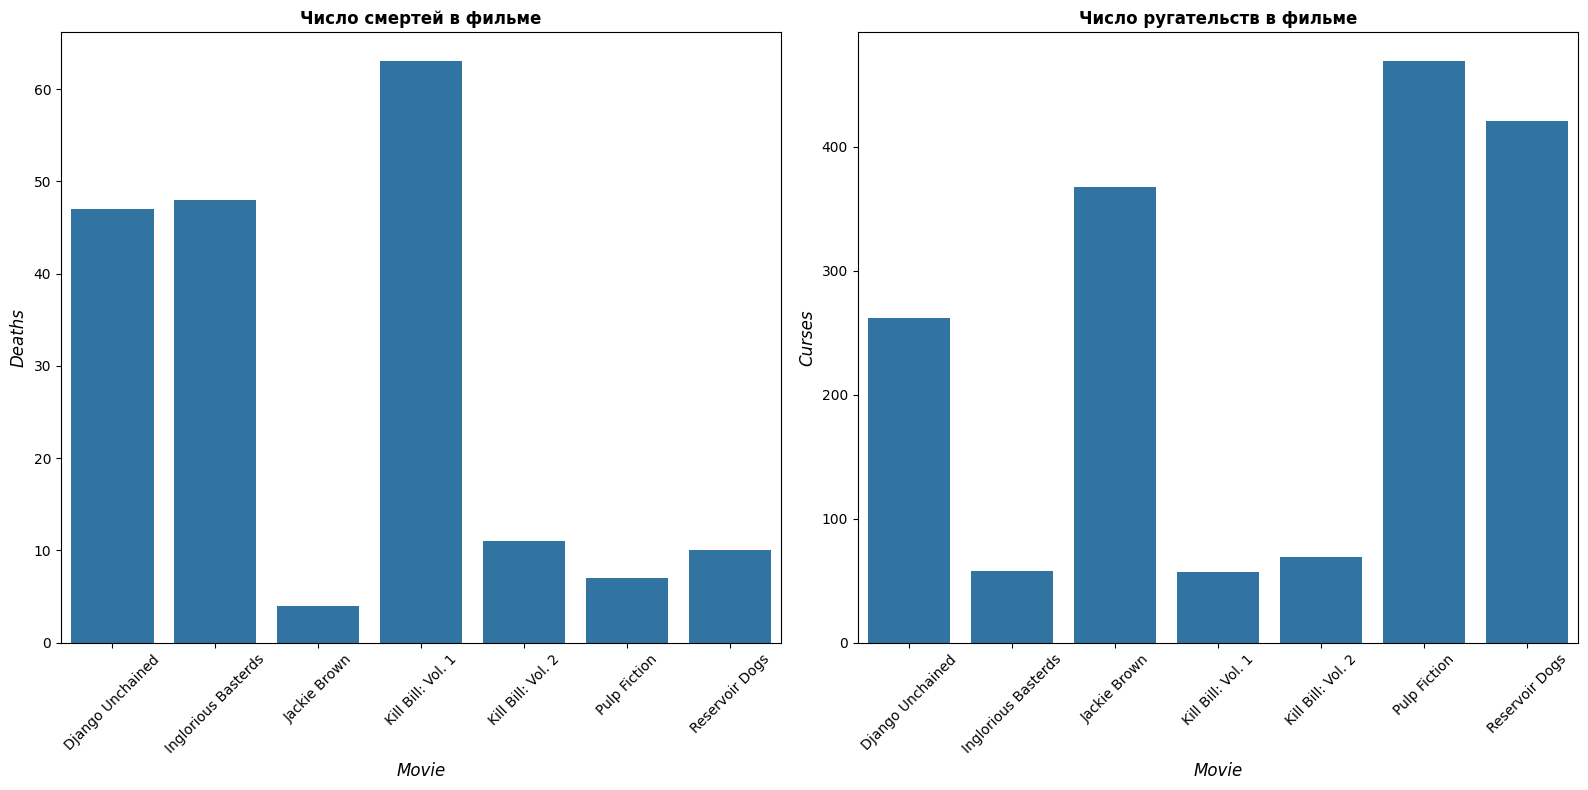

In [601]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
metrics = ['Deaths', 'Curses']
titles = ['Число смертей в фильме', 'Число ругательств в фильме']
i = 0

for metric, title in zip(metrics, titles):
    sns.barplot(data=df_counter, x=df_counter.index, y=metric, ax=ax[i])
    ax[i].set_title(title, weight='bold', size=12)
    ax[i].set_xlabel('Movie', style='italic', size=12)
    ax[i].set_ylabel(metric, style='italic', size=12)
    ax[i].tick_params(axis='x', labelrotation=45)
    i += 1

plt.tight_layout()
plt.show()

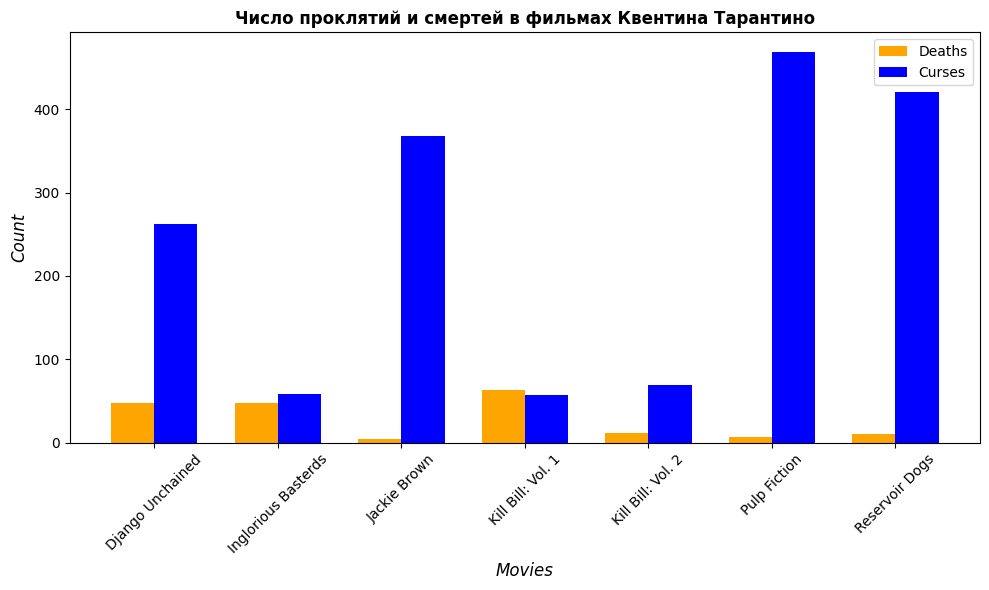

In [602]:

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(df_counter))

bars1 = ax.bar(index, df_counter['Deaths'], bar_width, label='Deaths', color='orange')
bars2 = ax.bar(index + bar_width, df_counter['Curses'], bar_width, label='Curses', color='blue')

ax.set_title('Число проклятий и смертей в фильмах Квентина Тарантино', weight='bold', size=12)
ax.set_xlabel('Movies', style='italic', size=12)
ax.set_ylabel('Count', style='italic', size=12)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_counter.index, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

## Частота употребления конкретных проклятий 

Будем смотреть по всем фильмам суммарно

In [603]:
df_curses_only = df_tarantino[df_tarantino['type'] == 'word'] # отберём только ругательства
curses_frequency = df_curses_only.groupby('word')['movie'].count().sort_values(ascending=False).reset_index()
curses_frequency.columns = ['word', 'frequency']
curses_frequency.head()

,word,frequency
0,fucking,407
1,shit,221
2,fuck,213
3,n-word,179
4,ass,140


In [604]:
total_curses = curses_frequency['frequency'].sum(axis = 0)
curses_frequency['percentage'] = curses_frequency['frequency'] / total_curses * 100
curses_frequency.head()

,word,frequency,percentage
0,fucking,407,23.8850
1,shit,221,12.9695
2,fuck,213,12.5000
3,n-word,179,10.5047
4,ass,140,8.2160


В разрезе по фильмам:

In [605]:
curses_frquency_movie = df_curses_only.pivot_table('minutes_in', index='movie', columns='word', aggfunc='count')
curses_frquency_movie['fucking'] #fucking — самое частое в выбранных фильмах в совокупности. Вот как часто оно встречается в каждом из фильмов.

movie
Django Unchained        15.0
Inglorious Basterds      9.0
Jackie Brown            46.0
Kill Bill: Vol. 1        5.0
Kill Bill: Vol. 2       19.0
Pulp Fiction           133.0
Reservoir Dogs         180.0
Name: fucking, dtype: float64

## Распределение времени между проклятиями 

Здесь будем смотреть на распределение интервалов между проклятиями. Посмотрим по всем фильмам в совокупности.

Колонка minutes_in — минута, в которую было произнесено слово. Следовательно, нужно найти разницу с предыдущим — это и будет количество минут между ругательствами.

In [606]:
df_curses_only.loc[:, 'minutes_between'] = df_curses_only.groupby('movie')['minutes_in'].diff(periods=1)
# группировка, чтобы избавиться от отрицательных значений (появлясются при вычислении разницы первого слова в фильме с последним в предыдущем)
df_curses_only

C:\Users\gloze\AppData\Local\Temp\ipykernel_17184\4282776008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curses_only.loc[:, 'minutes_between'] = df_curses_only.groupby('movie')['minutes_in'].diff(periods=1)


,movie,type,word,minutes_in,minutes_between
0,Reservoir Dogs,word,dick,0.40,NaN
1,Reservoir Dogs,word,dicks,0.43,0.03
2,Reservoir Dogs,word,fucked,0.55,0.12
3,Reservoir Dogs,word,fucking,0.61,0.06
4,Reservoir Dogs,word,bullshit,0.61,0.00
...,...,...,...,...,...
1888,Jackie Brown,word,motherfucker,141.80,0.25
1889,Jackie Brown,word,motherfucker,141.93,0.13
1890,Jackie Brown,word,ass,142.43,0.50
1891,Jackie Brown,word,fucking,142.47,0.04


In [607]:
df_curses_only[df_curses_only['minutes_between'] < 0]

,movie,type,word,minutes_in,minutes_between
50,Reservoir Dogs,word,fucking,6.73,-0.13
205,Reservoir Dogs,word,fuck,42.70,-0.65
283,Reservoir Dogs,word,fucking,62.41,-0.97
818,Pulp Fiction,word,ass,129.33,-0.19
1423,Django Unchained,word,n-word,131.73,-0.49
1821,Jackie Brown,word,fucking,121.20,-0.97


Теперь не вполне понятно, откуда эти нули. Просто занулим их

In [608]:
df_curses_only.loc[49:51]

,movie,type,word,minutes_in,minutes_between
49,Reservoir Dogs,word,fucking,6.86,0.05
50,Reservoir Dogs,word,fucking,6.73,-0.13
51,Reservoir Dogs,word,bastard,7.38,0.65


Видимо, нужно сделать сортировку по minutes_in

In [609]:
df_curses_only.sort_values(by='minutes_in', ascending=True).groupby('movie')['minutes_in'].diff(periods=1)

0        NaN
1       0.03
431      NaN
2       0.12
3       0.06
        ... 
1516    0.03
1517    0.03
1518    0.05
1519    0.32
1520    0.08
Name: minutes_in, Length: 1704, dtype: float64

In [610]:
df_curses_only.loc[:, 'minutes_between'] = df_curses_only.sort_values(by='minutes_in', ascending=True).groupby('movie')['minutes_in'].diff(periods=1)
df_curses_only

,movie,type,word,minutes_in,minutes_between
0,Reservoir Dogs,word,dick,0.40,NaN
1,Reservoir Dogs,word,dicks,0.43,0.03
2,Reservoir Dogs,word,fucked,0.55,0.12
3,Reservoir Dogs,word,fucking,0.61,0.06
4,Reservoir Dogs,word,bullshit,0.61,0.00
...,...,...,...,...,...
1888,Jackie Brown,word,motherfucker,141.80,0.25
1889,Jackie Brown,word,motherfucker,141.93,0.13
1890,Jackie Brown,word,ass,142.43,0.50
1891,Jackie Brown,word,fucking,142.47,0.04


In [611]:
q_99 = df_curses_only['minutes_between'].quantile(0.99)
data_for_plotting = df_curses_only[df_curses_only['minutes_between'] < q_99]
data_for_plotting

,movie,type,word,minutes_in,minutes_between
1,Reservoir Dogs,word,dicks,0.43,0.03
2,Reservoir Dogs,word,fucked,0.55,0.12
3,Reservoir Dogs,word,fucking,0.61,0.06
4,Reservoir Dogs,word,bullshit,0.61,0.00
5,Reservoir Dogs,word,fuck,0.66,0.05
...,...,...,...,...,...
1888,Jackie Brown,word,motherfucker,141.80,0.25
1889,Jackie Brown,word,motherfucker,141.93,0.13
1890,Jackie Brown,word,ass,142.43,0.50
1891,Jackie Brown,word,fucking,142.47,0.04


Text(0, 0.5, 'Frequency')

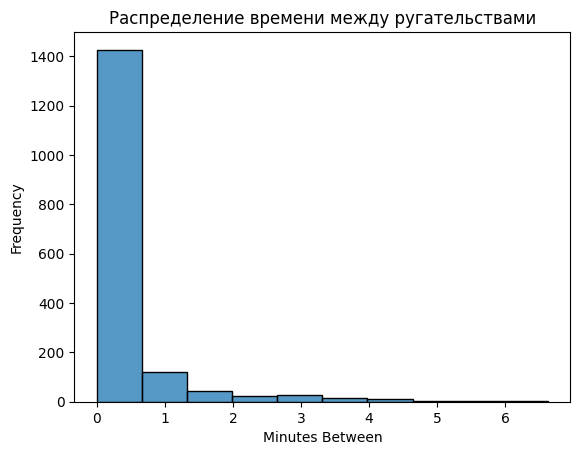

In [612]:
sns.histplot(data_for_plotting['minutes_between'], bins=10, kde=False)
plt.title('Распределение времени между ругательствами')
plt.xlabel('Minutes Between')
plt.ylabel('Frequency')

Видно, что проклятия в основном концетрируются в пределах минуты. В остальном не очень информативно. Хотелось бы видеть более детально по секундам. Возьмем квантиль 80

In [613]:
q_8 = df_curses_only['minutes_between'].quantile(0.8)
data_for_plotting = df_curses_only[df_curses_only['minutes_between'] < q_8]

Text(0, 0.5, 'Frequency')

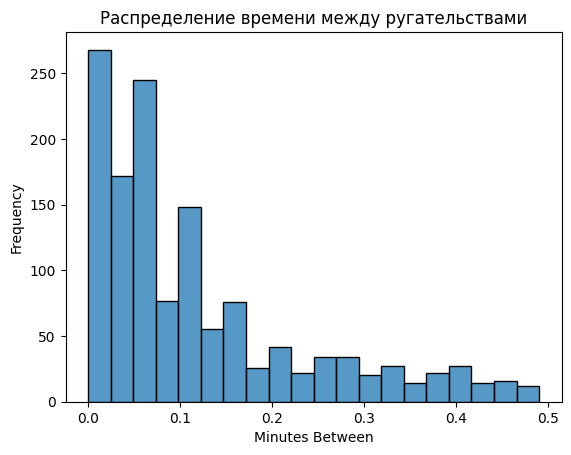

In [614]:
sns.histplot(data_for_plotting['minutes_between'], bins=20, kde=False)
plt.title('Распределение времени между ругательствами')
plt.xlabel('Minutes Between')
plt.ylabel('Frequency')

Более того, смогли увидеть, что распределение очень смещено к нулю. Чаще всего ругательства попадают в интервал до 6 секунд.

Таких промежутков более 600 для всех 1704 ругательств, произнесенных в фильмах.